In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/91902/Downloads/elevate labs/task 1/Cleaned_Titanic_Dataset.csv")
print(df.head())
print(df.info())
print(df.describe()) #Loading and inspecting the data

   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736  0.432793 -0.473674 -0.502445       False   
1         1       3    1 -0.258337 -0.474545 -0.473674 -0.488854       False   
2         1       1    1  0.433312  0.432793 -0.473674  0.420730       False   
3         0       3    0  0.433312 -0.474545 -0.473674 -0.486337       False   
4         0       3    0 -0.104637 -0.474545 -0.473674 -0.478116        True   

   Embarked_S  
0        True  
1        True  
2        True  
3        True  
4       False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    577 non-null    int64  
 1   Pclass      577 non-null    int64  
 2   Sex         577 non-null    int64  
 3   Age         577 non-null    float64
 4   SibSp       577 non-null    float64
 5   Parch       577 non-null   

In [5]:
df.agg(['mean', 'median', 'std', 'min', 'max']) #Summary statistics

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
mean,0.299827,2.502600,0.247834,-0.004480,-0.293706,-4.736736e-01,-0.347884,0.110919,0.750433
median,0.000000,3.000000,0.000000,-0.104637,-0.474545,-4.736736e-01,-0.474005,0.0,1.0
std,0.458579,0.733909,0.432129,0.657194,0.403796,2.777966e-16,0.253828,0.314304,0.433138
min,0.000000,1.000000,0.000000,-1.872184,-0.474545,-4.736736e-01,-0.648422,False,False
max,1.000000,3.000000,1.000000,1.893459,1.340132,-4.736736e-01,0.583318,True,True


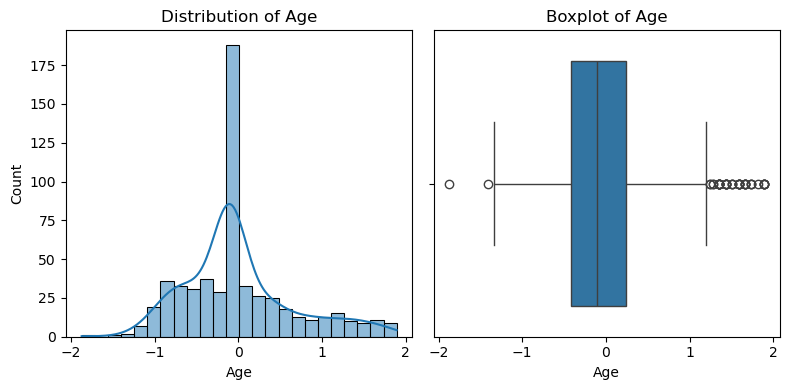

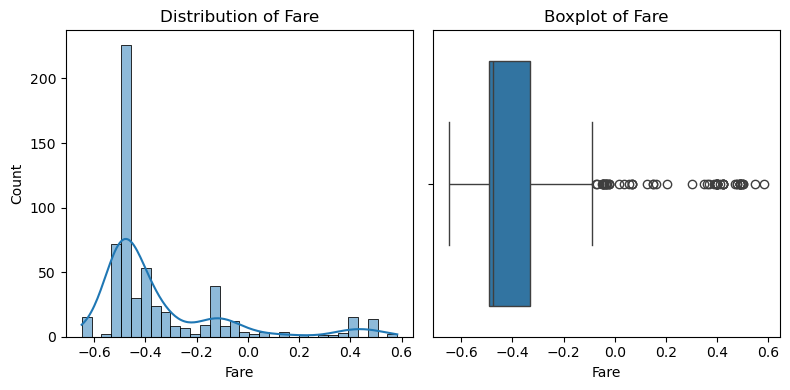

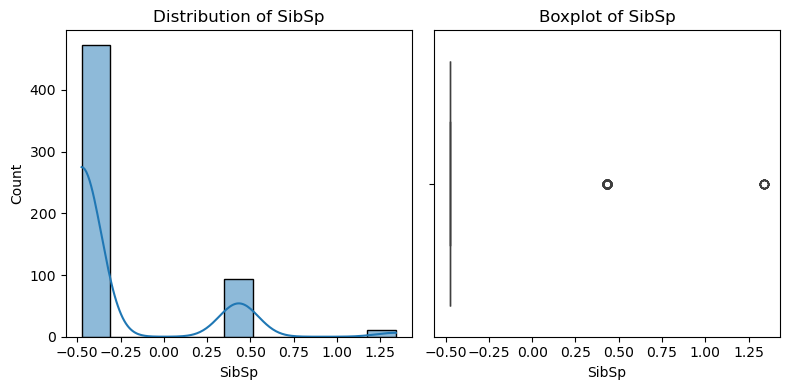

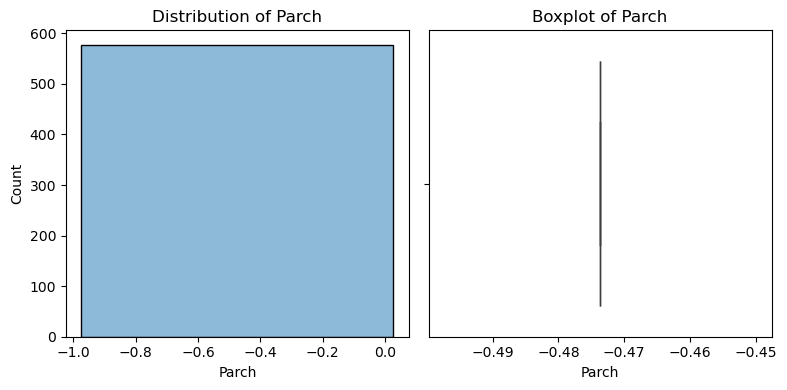

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in num_cols:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

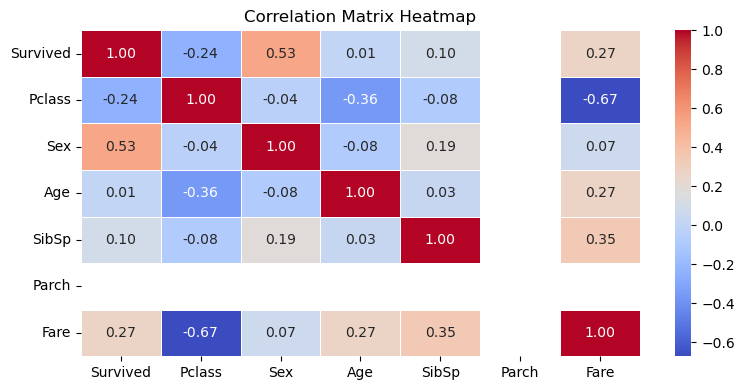

In [13]:
df_subset = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 4))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

#### Patterns, Trends & Inferences from Visuals
1. Pclass vs Survival
Pattern: More passengers from 1st class survived compared to 2nd and 3rd class.
Inference: Higher-class passengers were given priority during evacuation or had better access to lifeboats.

2. Sex vs Survival
Pattern: Females had significantly higher survival rates than males.
Inference: The "women and children first" protocol may have been followed, prioritizing female passengers.

3. Embarked Port vs Survival
Pattern: Passengers from Cherbourg (C) had better survival odds.
Inference: Possibly, more first-class passengers boarded at this port, leading to higher survival.

4. Fare vs Survival
Pattern: Higher-paying passengers had a greater survival rate.
Inference: High fare correlates with 1st-class tickets, hence better survival chances.

5. Age Distribution
Pattern: Survivors were more common among younger age groups, although not a strict trend.
Inference: Children might have been prioritized during the rescue operations.

6. SibSp/Parch vs Survival
Pattern: Passengers with 1–2 family members had better survival than those alone or with large families.
Inference: Being with a small family unit might have increased coordination and chances of rescue.

7. Fare/Boxplot Outliers
Pattern: Fare has multiple outliers on the higher end.
Inference: Some passengers paid extraordinarily high fares, possibly for luxury suites or elite service.

#### Anomalies Identified
1. Fare Column
Observation: Most passengers paid a fare below $100, but a few records show very high fares above $250.
Anomaly: These are outliers and could indicate wealthy 1st-class passengers or potential data inconsistencies.

2. Age Column
Observation: Most ages fall between 0 and 60, but some entries show ages above 70.
Anomaly: These are valid but rare; such outliers might skew models if left untreated.

3. Pclass vs Fare (Outlier Mismatch)
Observation: A few 3rd class passengers appear to have very high fares.
Anomaly: This is unusual and may be due to:
            Group/family bookings
            Influence of embarkation point on fare
            Data entry anomalies

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
